In [28]:
import numpy as np
import pandas as pd
from pyBibX.base import pbx_probe
from tabulate import tabulate
from prettytable import PrettyTable

In [2]:
# Load bib file
# Arguments for pbx_probe: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
# Note: the other arguments lead to an key error for some reason 
file_path = './bib-Files/scopus01.bib'
database = 'scopus'
bibfile = pbx_probe(file_bib = file_path)

A Total of 3794 Documents were Found ( 3863 Documents and 69 Duplicates )

Article = 2223
Book = 649
Book chapter = 419
Conference paper = 231
Conference review = 1
Editorial = 15
Note = 11
Retracted = 1
Review = 237
Short survey = 7


In [ ]:
# Generic report
report = bibfile.eda_bib()


Main Information    Results
0                                Timespan  1973-2025
1               Total Number of Countries          1
2            Total Number of Institutions          1
3                 Total Number of Sources       2554
4              Total Number of References          0
5               Total Number of Languages          1
6                    --unknow (# of docs)       3794
7                                    -//-       -//-
8               Total Number of Documents       3794
9                               --Article       2223
10                                 --Book        649
11                         --Book chapter        419
12                     --Conference paper        231
13                    --Conference review          1
14                            --Editorial         15
15                                 --Note         11
16                            --Retracted          1
17                               --Review        237
18                         --Short survey          7
19           Average Documents per Author        1.1
20      Average Documents per Institution    10243.0
21           Average Documents per Source       1.49
22             Average Documents per Year      72.96
23                                   -//-       -//-
24                Total Number of Authors       8060
25       Total Number of Authors Keywords       7482
26  Total Number of Authors Keywords Plus       5840
27        Total Single-Authored Documents       1342
28         Total Multi-Authored Documents       2452
29            Average Collaboration Index       2.33
30                            Max H-Index          9
31                                   -//-       -//-
32              Total Number of Citations     161772
33           Average Citations per Author      20.07
34      Average Citations per Institution   161772.0
35         Average Citations per Document      42.64
36           Average Citations per Source      63.34
37                                   -//-       -//-

In [ ]:
#bibfile.data is the dataframe with the content
print(tabulate(bibfile.data.head(n = 10), headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
# Check Docs IDs
print(tabulate(bibfile.table_id_doc, headers = 'keys', tablefmt = 'psql'))

+------+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
#DocIDs per Type
print(tabulate(bibfile.id_doc_types(), headers = 'keys', tablefmt = 'psql'))

+----+-------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
# Check authors
print(tabulate(bibfile.table_id_aut, headers='keys', tablefmt='psql'))

+------+--------+------------------------------------------+
|      | ID     | Author                                   |
|------+--------+------------------------------------------|
|    0 | a_0    | (rami)shani, a.b.                        |
|    1 | a_1    | aakhus, mark                             |
|    2 | a_2    | abbas, mazhar                            |
|    3 | a_3    | abbas, sammar                            |
|    4 | a_4    | abbasi, kashif shafique                  |
|    5 | a_5    | abbott, ian                              |
|    6 | a_6    | abdelhakim, mohamed                      |
|    7 | a_7    | abdelmoteleb, samir a.                   |
|    8 | a_8    | abdelwahab, shimaa m.                    |
|    9 | a_9    | abdul-jabbar, mustafa                    |
|   10 | a_10   | abdul-samad, zulkiflee                   |
|   11 | a_11   | abdulla, aysha ebrahim                   |
|   12 | a_12   | abdulla, israa salah                     |
|   13 | a_13   | abdull

In [ ]:
# Check institutions
print(tabulate(bibfile.table_id_uni, headers='keys', tablefmt='psql'))

# Note: maybe there is an option to import institution on scopus

+----+------+---------------+
|    | ID   | Institution   |
|----+------+---------------|
|  0 | i_0  | UNKNOW        |
+----+------+---------------+


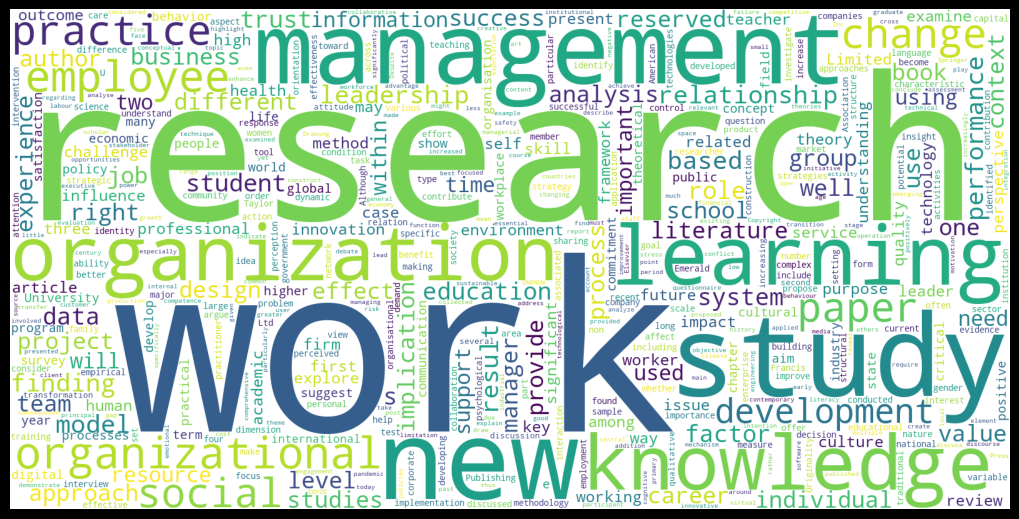

In [ ]:
# Wordcloud from abstracts
bibfile.word_cloud_plot(entry='abs')

In [29]:
# Sorting words in abstracts by importance
table             = PrettyTable()
data_wd           = bibfile.ask_gpt_wd
table.field_names = ['Word', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value, 4)])
print(table)

+----------------+------------+
|      Word      | Importance |
+----------------+------------+
|      work      |    1.0     |
|    research    |   0.6972   |
|     study      |   0.6707   |
|      new       |   0.6431   |
|   management   |   0.5043   |
|    learning    |   0.4658   |
|  organization  |   0.4655   |
|   knowledge    |   0.4647   |
| organizational |   0.4298   |
|    employee    |   0.4158   |
|    practice    |   0.3843   |
|     social     |   0.3754   |
|     paper      |   0.3723   |
|     change     |   0.3715   |
|  development   |   0.3666   |
|  relationship  |   0.3444   |
|  performance   |   0.3379   |
|     model      |   0.3296   |
|   leadership   |   0.326    |
|     based      |   0.3189   |
|    finding     |   0.3171   |
|     result     |   0.3111   |
|      role      |   0.2879   |
|     trust      |   0.2856   |
|    student     |   0.2838   |
|   education    |   0.2762   |
|     factor     |   0.2741   |
|     system     |   0.2736   |
|       

In [30]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                         'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                         'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Portuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                         'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'abs', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed